In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dataset:
vg_sales = pd.read_csv('./dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# Check first few rows/records:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check dataset info:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
# Check total null values for each Column:
vg_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# Check the two games with no name:
vg_sales[vg_sales.Name.isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


* The missing names must have been a result of error in data collection due to the fact that this data are scraped from the web.

### Cleaning Year_of_Release Column

* What I did here is to fill the missing values in the Year_of_Release column based on the average year for each Platform.

In [7]:
# Check the different unique platforms:
vg_sales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
# Group Year_of_Release column by Platform
grouped = vg_sales.groupby('Platform')['Year_of_Release']

In [9]:
# Function to fill the missing values in the Year_of_Release column based on the average year for each Platform:
fill_na = lambda g: g.fillna(g.mean())

In [10]:
# Apply the function to for each group to fill missing values by the average year for each Platform:
cleaned_yor = grouped.apply(fill_na)

In [11]:
# Check the total number of missing values in Year_of_Release column.
cleaned_yor.isnull().sum()

0

In [12]:
# Update the Year_of_Release column in original DataFrame with the cleaned one:
vg_sales['Year_of_Release'] = cleaned_yor

## Cleaning Publisher Column
* In this section, I replaced some missing Publisher values by their corresponding non-NaN value in Developer column. I think this makes sense as Developer and Publisher both put the finished game on the market for the world to play (this is also true with solo developers).

* I also dropped the Developer column for its high number of NaN values and I just stick with the Publisher column to describe who published/developed the game.

In [13]:
# Check total NaN values for Publisher: 
vg_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [14]:
# Replace missing Publisher by their corresponding non-NaN Developer value:
vg_sales.loc[vg_sales.Publisher.isnull(), 'Publisher'] = vg_sales['Developer']

In [15]:
# Drop the Developer column:
vg_sales.drop('Developer', axis=1, inplace=True)

In [16]:
# Check updated total null values:
vg_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            45
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Rating             6769
dtype: int64

## Cleaning Year_of_Release Columns
* In this section, I change the default datatype of Year_of_Release column into integer and did some changes in wrong recorded data.

In [17]:
# Change the datatype of Year_of_Release column into integer.
vg_sales['Year_of_Release'] = vg_sales['Year_of_Release'].astype(np.int)

In [18]:
vg_sales.Year_of_Release.describe()

count    16719.000000
mean      2006.464143
std          5.897407
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

* The max value of 2020 is kinda wrong as this data was scraped in 2016 so there's should be no games at least greater than 2017.
* Looking at this data, I found (by a quick search on google) that this game was actually released on 2009.
* So I instead used this fact to change the year of release of this game:

In [19]:
# Checking the game with a 2020 year release:
vg_sales[vg_sales.Year_of_Release == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,NaN,NaN,E


In [20]:
# Imagine: Makeup Artist was actually released on 12/05/2009:
vg_sales.loc[5936, 'Year_of_Release'] = 2009

In [21]:
# Looking at the updated statistics:
vg_sales['Year_of_Release'].describe()

count    16719.000000
mean      2006.463485
std          5.896511
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Year_of_Release, dtype: float64

* Now we can see here that the record sales started on 1980 to 2017.

## Cleaning *_Sales columns
* What I did here is to change the names of sales column into more descriptive and representative names.

In [22]:
changes = {
    'NA_Sales': 'North America Sales',
    'EU_Sales': 'Europe Sales',
    'JP_Sales': 'Japan Sales',
    'Other_Sales': 'Others Sales',
    'Global_Sales': 'Global Sales'
}
vg_sales.rename(columns=changes, inplace=True)
vg_sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'North America Sales', 'Europe Sales', 'Japan Sales', 'Others Sales',
       'Global Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Rating'],
      dtype='object')

## Cleaning Genre Column

When I'm doing data analysis, I stumbled upon some games with incorrect game genre record (see the plot below). This will affect my analysis and will lead me to erroneous conclusion so I fixed this wrong records in this section.

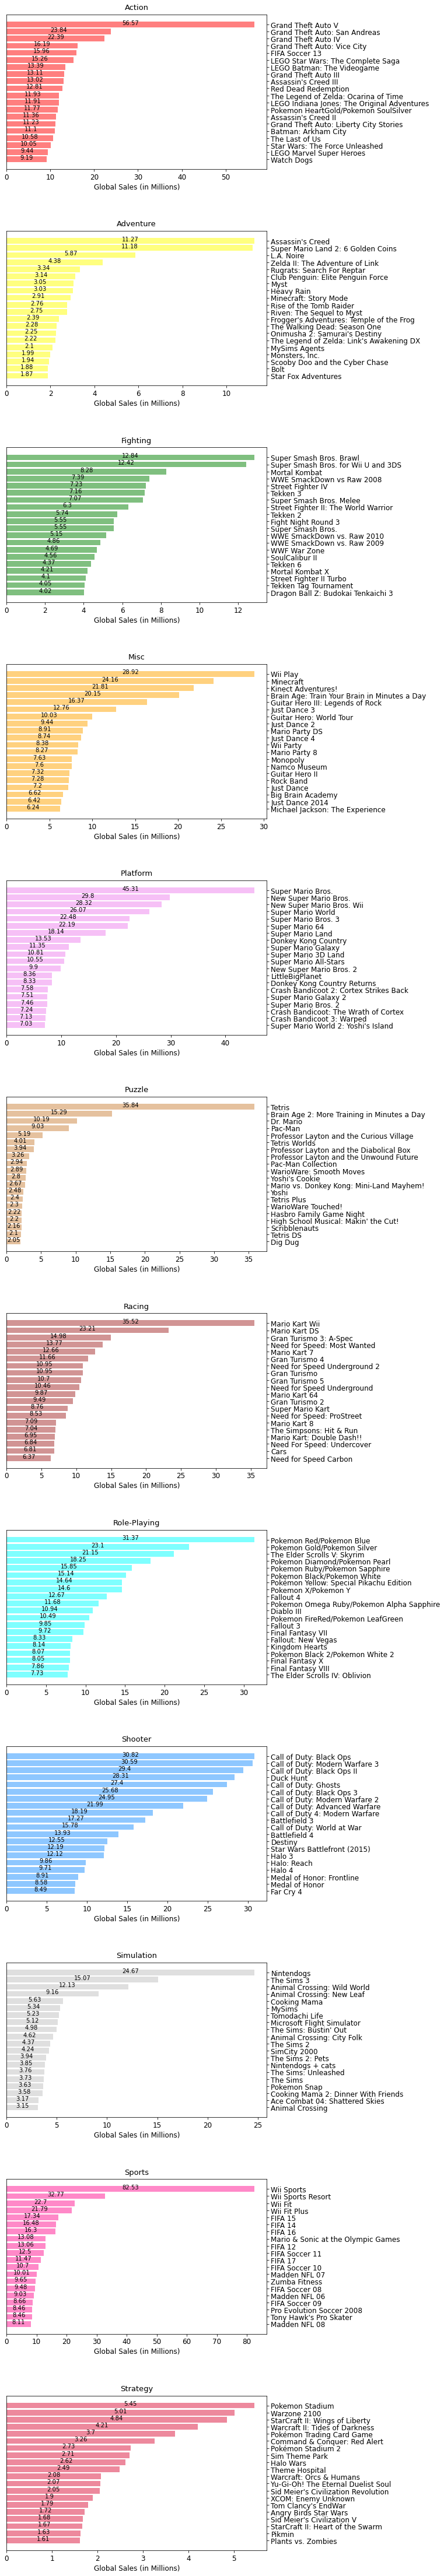

In [27]:
import matplotlib.pyplot as plt
colors_genre = ['red','yellow', 'green', 'orange','violet', 'peru', 
          'brown', 'cyan','dodgerblue','silver','deeppink','crimson']
title_sales = vg_sales.groupby('Name')['Global Sales'].sum()
title_genres = vg_sales[['Name', 'Genre']]
res = pd.merge(title_sales, title_genres, on='Name').set_index(['Genre', 'Name'])
res = res.sort_index()
fig, axes = plt.subplots(12, 1, figsize=(8, 80))
genres = res.reset_index()['Genre'].unique()
for i in range(12):
    genre = genres[i]
    rec = res.loc[genre].sort_values(by='Global Sales')
    rec = rec.drop_duplicates()[-20:]
    axes[i].barh(rec['Global Sales'].index, rec['Global Sales'].values, 
                 color=colors_genre[i], alpha=0.5)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
    axes[i].set_title(genre, fontsize=13, y=1.01)
    axes[i].set_xlabel('Global Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    s = rec['Global Sales']
    for j in s.index:
        axes[i].text(s.loc[j] / 2, j, round(s.loc[j], 2), 
                     ha='center')
    #add_bar_label(axes[i], rec['Global Sales'], isbarh=True, xincr=-1)
fig.subplots_adjust(hspace=0.4)

As we can see in the plot above, there are wrong game genre for some games:

1. ***Fifa Soccer 13 was under Action. This is wrong as FIFA titles are supposed to be in the Sports genre.***
2. ***Pokemong HeartGold/Pokemon SoulSiver is a role-playing game not an Action game.***
3. ***Minecraft supposed to be a Adventure game and not Misc.***

There are also some inconsistency in data, for example. Assassin's Creed is the most high selling title under Adventure, but its sequel, Assassin's Creed II and III are under Action games. I chose not to fixed this as both genre really describe the Assasin's Creed games (Action-Adventure) so I instead focused on fixing the games included in the numbered list above.

This instance remind me to be thoughtful of my data and always become wary with my analysis and conclusions.

In [33]:
# fixing incorrect records: 
vg_sales.loc[vg_sales.Name == 'FIFA Soccer 13'].Genre = 'Sports'
vg_sales.loc[vg_sales.Name == 'Pokemong HeartGold/Pokemon SoulSiver'].Genre = 'Role-Playing'
vg_sales.loc[vg_sales.Name == 'Minecraft'].Genre = 'Adventure'

## Output cleaned DataFrame
* In this section, I converted the cleaned data into csv file for analysis.

In [23]:
# Write vg_sales dataFrame into vg_sales_cleaned.csv
vg_sales.to_csv('./dataset/vg_sales_cleaned.csv')